In [223]:
import pandas as pd

# CSV 파일 불러오기
file_path = '/Users/bg.lim/Downloads/TAMU_Agri/New_CGM/ALL_EMA.csv'

# 파일 로드 (인코딩 에러 방지)
df = pd.read_csv(file_path, encoding="utf-8")


In [225]:
df

,StudyID,Timestamp,Glucose,Relative_Day,Previous_1_Time,Previous_1_Glucose,Previous_1_T_Diff,Previous_2_Time,Previous_2_Glucose,Previous_2_T_Diff,...,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,How_sad,How_energetic,How_tired,How_lonely,DailyAvgLoneliness
0,1,2022-10-06 01:34:00,78,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2022-10-06 01:49:00,76,1,2022-10-06 01:34:00,78.0,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2022-10-06 02:04:00,78,1,2022-10-06 01:49:00,76.0,15.0,2022-10-06 01:34:00,78.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2022-10-06 02:19:00,75,1,2022-10-06 02:04:00,78.0,15.0,2022-10-06 01:49:00,76.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2022-10-06 02:34:00,75,1,2022-10-06 02:19:00,75.0,15.0,2022-10-06 02:04:00,78.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71712,89,2023-05-09 19:08:00,114,14,2023-05-09 18:53:00,86.0,15.0,2023-05-09 18:38:00,71.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71713,89,2023-05-09 19:23:00,136,14,2023-05-09 19:08:00,114.0,15.0,2023-05-09 18:53:00,86.0,30.0,...,0.666667,1.0,0.0,0.0,0.0,0.0,0.333333,0.666667,0.0,0.0
71714,89,2023-05-09 19:38:00,142,14,2023-05-09 19:23:00,136.0,15.0,2023-05-09 19:08:00,114.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71715,89,2023-05-09 19:53:00,137,14,2023-05-09 19:38:00,142.0,15.0,2023-05-09 19:23:00,136.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# GE_1h -> based on Threshold(Current)

In [230]:
import pandas as pd


# GE_1h 값 업데이트
# 조건: Glucose_After_1h > Threshold -> 1
#        Glucose_After_1h <= Threshold -> 0
#        Threshold 또는 Glucose_After_1h 값이 없는 경우 -> ""
df["GE_1h"] = df.apply(lambda row: 1 if row["Glucose_After_1h"] > row["Threshold"]
                         else (0 if pd.notna(row["Glucose_After_1h"]) and pd.notna(row["Threshold"])
                               else ""), axis=1)

# 변경된 데이터 저장
output_file_path = "updated_file.csv"
df.to_csv(output_file_path, index=False)

print(f"Updated file saved as: {output_file_path}")


Updated file saved as: updated_file.csv


In [5]:
import pandas as pd

# CSV 파일 불러오기
file_path = '/Users/bg.lim/Downloads/TAMU_Agri/New_CGM/updated_file.csv'

# 파일 로드 (인코딩 에러 방지)
df = pd.read_csv(file_path, encoding="utf-8")


In [11]:
# Onset_GE 값 업데이트
# GE_1h 값이 연속으로 1일 경우 첫 번째 1에만 Onset_GE = 1
# 이후 연속된 1에서는 Onset_GE = 0

# Onset_GE 값 초기화 (NaN으로 설정)
df['Onset_GE'] = None

# GE_1h가 1인 경우, 연속성을 고려하여 Onset_GE 설정
previous_value = 0

for i in range(len(df)):
    if pd.isna(df.loc[i, "GE_1h"]):  # GE_1h가 NaN이면 Onset_GE도 NaN
        df.loc[i, "Onset_GE"] = None
    elif df.loc[i, "GE_1h"] == 1:
        # 이전 값이 1이 아니거나 처음 나오는 1이면 Onset_GE = 1
        if previous_value == 0:
            df.loc[i, "Onset_GE"] = 1
        else:
            df.loc[i, "Onset_GE"] = 0
    elif df.loc[i, "GE_1h"] == 0:
        df.loc[i, "Onset_GE"] = 0  # GE_1h가 0이면 Onset_GE도 0
    previous_value = df.loc[i, "GE_1h"]

# 변경된 데이터 저장
output_file_path = "onset.csv"
df.to_csv(output_file_path, index=False)


print(f"Updated file saved as: {output_file_path}")


Updated file saved as: onset.csv


# Add EMA + EMA_time

In [14]:
import pandas as pd
from datetime import datetime

# 파일 경로 설정
onset_file_path = "/Users/bg.lim/Downloads/TAMU_Agri/New_CGM/onset.csv"
ema_file_path = "/Users/bg.lim/Downloads/TAMU_Agri/New_CGM/EMA_timepoint.xlsx"

# 데이터 불러오기
onset_df = pd.read_csv(onset_file_path)
ema_df = pd.read_excel(ema_file_path)

# Timestamp를 datetime 형식으로 변환
onset_df["Timestamp"] = pd.to_datetime(onset_df["Timestamp"])
ema_df["Timestamp"] = pd.to_datetime(ema_df["Timestamp"])

# EMA 데이터에서 필요한 컬럼들 (bored ~ DailyAvgLoneliness까지)
ema_columns = ["bored", "hungry", "How_happy", "How_cheerful", "How_relaxed",
               "How_stressed", "How_anxious", "How_angry", "How_sad", 
               "How_energetic", "How_tired", "How_lonely", "DailyAvgLoneliness"]

# 새 컬럼을 추가하기 위해 초기화
for col in ema_columns:
    onset_df[col] = None
onset_df["EMA_time"] = None

# 가장 가까운 EMA 값을 찾는 함수
def find_closest_ema(timestamp):
    closest_row = ema_df.iloc[(ema_df["Timestamp"] - timestamp).abs().argsort()[:1]]
    return closest_row.iloc[0] if not closest_row.empty else None

# 각 onset의 Timestamp에 대해 가장 가까운 EMA 값을 찾아서 할당
for idx, row in onset_df.iterrows():
    closest_ema = find_closest_ema(row["Timestamp"])
    if closest_ema is not None:
        for col in ema_columns:
            onset_df.at[idx, col] = closest_ema[col]
        onset_df.at[idx, "EMA_time"] = closest_ema["Timestamp"]

# 결과 저장
onset_df.to_csv("updated_onset.csv", index=False)
print("새로운 파일이 'updated_onset.csv'로 저장되었습니다.")


새로운 파일이 'updated_onset.csv'로 저장되었습니다.


In [16]:
import pandas as pd

# 파일 경로 설정
updated_onset_file_path = "/Users/bg.lim/Downloads/TAMU_Agri/New_CGM/updated_onset.csv"

# 데이터 불러오기
updated_onset_df = pd.read_csv(updated_onset_file_path)

# Timestamp 및 EMA_time을 datetime 형식으로 변환
updated_onset_df["Timestamp"] = pd.to_datetime(updated_onset_df["Timestamp"])
updated_onset_df["EMA_time"] = pd.to_datetime(updated_onset_df["EMA_time"])

# onset 데이터 Timestamp 정렬 (merge_asof 사용을 위해 필수)
updated_onset_df = updated_onset_df.sort_values(by="Timestamp")

# 기준이 될 Timestamp 리스트 생성
reference_df = updated_onset_df[["Timestamp"]].copy()
reference_df = reference_df.rename(columns={"Timestamp": "Reference_Timestamp"})

# EMA_time을 기준으로 이후 가장 가까운 Timestamp 찾기
updated_onset_df = pd.merge_asof(updated_onset_df, reference_df, 
                                 left_on="EMA_time", right_on="Reference_Timestamp", 
                                 direction="forward")

# E_T_Diff 재계산 (음수 제거)
updated_onset_df["E_T_Diff"] = (updated_onset_df["Reference_Timestamp"] - updated_onset_df["Timestamp"]).dt.total_seconds().div(60).astype(int)

# 불필요한 Reference_Timestamp 컬럼 제거
updated_onset_df.drop(columns=["Reference_Timestamp"], inplace=True)

# 원래 순서 유지
updated_onset_df = updated_onset_df.sort_values(by="Timestamp")

# 결과 저장
updated_onset_df.to_csv("updated_onset_with_positive_E_T_Diff.csv", index=False)
print("새로운 파일이 'updated_onset_with_positive_E_T_Diff.csv'로 저장되었습니다.")


새로운 파일이 'updated_onset_with_positive_E_T_Diff.csv'로 저장되었습니다.


In [26]:
import pandas as pd

updated_onset_file_path = "/Users/bg.lim/Downloads/TAMU_Agri/New_CGM/updated_onset_with_positive_E_T_Diff.csv"
# 데이터 불러오기
updated_onset_df = pd.read_csv(updated_onset_file_path)

# Timestamp 및 EMA_time을 datetime 형식으로 변환
updated_onset_df["Timestamp"] = pd.to_datetime(updated_onset_df["Timestamp"])
updated_onset_df["EMA_time"] = pd.to_datetime(updated_onset_df["EMA_time"])

# E_T_Diff 재계산 (Timestamp - EMA_time)
updated_onset_df["E_T_Diff"] = (updated_onset_df["Timestamp"] - updated_onset_df["EMA_time"]).dt.total_seconds()

# 초 단위를 반올림하여 분과 초로 변환
updated_onset_df["E_T_Diff"] = updated_onset_df["E_T_Diff"].apply(
    lambda x: f"{int(abs(x) // 60):02}:{int(round(abs(x) % 60)):02}" if x >= 0 else f"-{int(abs(x) // 60):02}:{int(round(abs(x) % 60)):02}"
)

# 결과 저장
output_file_path = "EMA_Diff.csv"
updated_onset_df.to_csv(output_file_path, index=False)

print(f"✅ 파일이 저장되었습니다: {output_file_path}")

✅ 파일이 저장되었습니다: EMA_Diff.csv


# Model 

In [114]:
import pandas as pd

# CSV 파일 불러오기
file_path = '/Users/bg.lim/Downloads/TAMU_Agri/New_CGM/EMA_Diff.csv'

# 파일 로드 (인코딩 에러 방지)
df1 = pd.read_csv(file_path, encoding="utf-8")
df1

,StudyID,Timestamp,Glucose,Relative_Day,Previous_1_Time,Previous_1_Glucose,Previous_1_T_Diff,Previous_2_Time,Previous_2_Glucose,Previous_2_T_Diff,...,How_stressed,How_anxious,How_angry,How_sad,How_energetic,How_tired,How_lonely,DailyAvgLoneliness,EMA_time,E_T_Diff
0,1,2022-10-06 01:34:00,78,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0.333333,0.333333,0.0,0.0,0.666667,0.333333,0.0,0.0,2022-10-06 08:11:56,-397:56
1,1,2022-10-06 01:49:00,76,1,2022-10-06 01:34:00,78.0,15.0,NaN,NaN,NaN,...,0.333333,0.333333,0.0,0.0,0.666667,0.333333,0.0,0.0,2022-10-06 08:11:56,-382:56
2,1,2022-10-06 02:04:00,78,1,2022-10-06 01:49:00,76.0,15.0,2022-10-06 01:34:00,78.0,30.0,...,0.333333,0.333333,0.0,0.0,0.666667,0.333333,0.0,0.0,2022-10-06 08:11:56,-367:56
3,1,2022-10-06 02:19:00,75,1,2022-10-06 02:04:00,78.0,15.0,2022-10-06 01:49:00,76.0,30.0,...,0.333333,0.333333,0.0,0.0,0.666667,0.333333,0.0,0.0,2022-10-06 08:11:56,-352:56
4,1,2022-10-06 02:34:00,75,1,2022-10-06 02:19:00,75.0,15.0,2022-10-06 02:04:00,78.0,30.0,...,0.333333,0.333333,0.0,0.0,0.666667,0.333333,0.0,0.0,2022-10-06 08:11:56,-337:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71712,89,2023-05-09 19:08:00,114,14,2023-05-09 18:53:00,86.0,15.0,2023-05-09 18:38:00,71.0,30.0,...,0.000000,0.000000,0.0,0.0,0.333333,0.666667,0.0,0.0,2023-05-09 19:16:58,-08:58
71713,89,2023-05-09 19:23:00,136,14,2023-05-09 19:08:00,114.0,15.0,2023-05-09 18:53:00,86.0,30.0,...,0.000000,0.000000,0.0,0.0,0.333333,0.666667,0.0,0.0,2023-05-09 19:16:58,06:02
71714,89,2023-05-09 19:38:00,142,14,2023-05-09 19:23:00,136.0,15.0,2023-05-09 19:08:00,114.0,30.0,...,0.000000,0.000000,0.0,0.0,0.333333,0.666667,0.0,0.0,2023-05-09 19:16:58,21:02
71715,89,2023-05-09 19:53:00,137,14,2023-05-09 19:38:00,142.0,15.0,2023-05-09 19:23:00,136.0,30.0,...,0.000000,0.000000,0.0,0.0,0.333333,0.666667,0.0,0.0,2023-05-09 19:16:58,36:02


In [116]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71717 entries, 0 to 71716
Data columns (total 74 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   StudyID                71717 non-null  int64  
 1   Timestamp              71717 non-null  object 
 2   Glucose                71717 non-null  int64  
 3   Relative_Day           71717 non-null  int64  
 4   Previous_1_Time        71643 non-null  object 
 5   Previous_1_Glucose     71643 non-null  float64
 6   Previous_1_T_Diff      71643 non-null  float64
 7   Previous_2_Time        71569 non-null  object 
 8   Previous_2_Glucose     71569 non-null  float64
 9   Previous_2_T_Diff      71569 non-null  float64
 10  Previous_3_Time        71495 non-null  object 
 11  Previous_3_Glucose     71495 non-null  float64
 12  Previous_3_T_Diff      71495 non-null  float64
 13  Previous_4_Time        71421 non-null  object 
 14  Previous_4_Glucose     71421 non-null  float64
 15  Pr

In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# EMA_time to datetime

# Select X variables (features)
X_columns = [
    "Glucose", "Slope_Pre_1h", "Slope_Pre_2h", "Slope_Pre_2.5h", 
    "Mean_Glucose_Pre_1h","Mean_Glucose_Pre_2h","Mean_Glucose_Pre_2.5h",
    "Std_Glucose_Pre_1h","Std_Glucose_Pre_2h","Std_Glucose_Pre_2.5h",
    "Monday","Tuseday","Wednesday","Thursday","Friday","Saturday","Sunday",
    "is_weekend", "Time_24h", "bored", "hungry", "How_happy", "How_cheerful", 
    "How_relaxed", "How_stressed", "How_anxious", "How_angry", "How_sad", "How_energetic", 
    "How_tired", "How_lonely", "DailyAvgLoneliness", "E_T_Diff"
] 

# Define target variable (Y)
Y_column = "Onset_GE"

# Ensure X_columns exist in df1 before selection
X_columns = [col for col in X_columns if col in df1.columns]

# Define X and Y datasets
X = df1[X_columns].copy()
y = df1[Y_column].copy()


# "E_T_Diff"가 문자열이면 초(second) 단위로 변환
if "E_T_Diff" in X.columns and X["E_T_Diff"].dtype == object:
    def convert_to_seconds(time_str):
        """ 'MM:SS' 문자열을 초 단위(int)로 변환 """
        if isinstance(time_str, str) and ":" in time_str:
            minutes, seconds = map(int, time_str.split(":"))
            return (minutes * 60) + seconds
        return time_str  # 변환 불가능한 값은 그대로 유지
    
    X["E_T_Diff"] = X["E_T_Diff"].apply(convert_to_seconds)


# "Time_24h" 변환 (문자열 → datetime → 총 분 단위 변환)
if "Time_24h" in X.columns and X["Time_24h"].dtype == object:
    # "HH:MM" → datetime.time 형식으로 변환
    X["Time_24h"] = pd.to_datetime(X["Time_24h"], format="%H:%M").dt.time
    # 총 분 단위로 변환 (예: 19:51 → (19 × 60) + 51 = 1191)
    X["Time_24h"] = X["Time_24h"].apply(lambda x: x.hour * 60 + x.minute)

 # NaN이 포함된 행 제거
df = pd.concat([X, y], axis=1)  # X와 y를 합쳐서 결측치 처리
df = df.dropna()  # 결측치가 있는 모든 행 제거
X = df[X_columns]
y = df[Y_column]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"✅ 모델 정확도: {accuracy:.4f}")
print("\n📌 분류 보고서:\n", report)

✅ 모델 정확도: 0.9711

📌 분류 보고서:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      7827
         1.0       1.00      0.03      0.06       240

    accuracy                           0.97      8067
   macro avg       0.99      0.51      0.52      8067
weighted avg       0.97      0.97      0.96      8067



# Class imbalance (0/1), SMOTE

In [1]:
import pandas as pd

# CSV 파일 불러오기
file_path = '/Users/bg.lim/Downloads/TAMU_Agri/New_CGM/EMA_Diff.csv'

# 파일 로드 (인코딩 에러 방지)
df = pd.read_csv(file_path, encoding="utf-8")
df

,StudyID,Timestamp,Glucose,Relative_Day,Previous_1_Time,Previous_1_Glucose,Previous_1_T_Diff,Previous_2_Time,Previous_2_Glucose,Previous_2_T_Diff,...,How_stressed,How_anxious,How_angry,How_sad,How_energetic,How_tired,How_lonely,DailyAvgLoneliness,EMA_time,E_T_Diff
0,1,2022-10-06 01:34:00,78,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0.333333,0.333333,0.0,0.0,0.666667,0.333333,0.0,0.0,2022-10-06 08:11:56,-397:56
1,1,2022-10-06 01:49:00,76,1,2022-10-06 01:34:00,78.0,15.0,NaN,NaN,NaN,...,0.333333,0.333333,0.0,0.0,0.666667,0.333333,0.0,0.0,2022-10-06 08:11:56,-382:56
2,1,2022-10-06 02:04:00,78,1,2022-10-06 01:49:00,76.0,15.0,2022-10-06 01:34:00,78.0,30.0,...,0.333333,0.333333,0.0,0.0,0.666667,0.333333,0.0,0.0,2022-10-06 08:11:56,-367:56
3,1,2022-10-06 02:19:00,75,1,2022-10-06 02:04:00,78.0,15.0,2022-10-06 01:49:00,76.0,30.0,...,0.333333,0.333333,0.0,0.0,0.666667,0.333333,0.0,0.0,2022-10-06 08:11:56,-352:56
4,1,2022-10-06 02:34:00,75,1,2022-10-06 02:19:00,75.0,15.0,2022-10-06 02:04:00,78.0,30.0,...,0.333333,0.333333,0.0,0.0,0.666667,0.333333,0.0,0.0,2022-10-06 08:11:56,-337:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71712,89,2023-05-09 19:08:00,114,14,2023-05-09 18:53:00,86.0,15.0,2023-05-09 18:38:00,71.0,30.0,...,0.000000,0.000000,0.0,0.0,0.333333,0.666667,0.0,0.0,2023-05-09 19:16:58,-08:58
71713,89,2023-05-09 19:23:00,136,14,2023-05-09 19:08:00,114.0,15.0,2023-05-09 18:53:00,86.0,30.0,...,0.000000,0.000000,0.0,0.0,0.333333,0.666667,0.0,0.0,2023-05-09 19:16:58,06:02
71714,89,2023-05-09 19:38:00,142,14,2023-05-09 19:23:00,136.0,15.0,2023-05-09 19:08:00,114.0,30.0,...,0.000000,0.000000,0.0,0.0,0.333333,0.666667,0.0,0.0,2023-05-09 19:16:58,21:02
71715,89,2023-05-09 19:53:00,137,14,2023-05-09 19:38:00,142.0,15.0,2023-05-09 19:23:00,136.0,30.0,...,0.000000,0.000000,0.0,0.0,0.333333,0.666667,0.0,0.0,2023-05-09 19:16:58,36:02


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71717 entries, 0 to 71716
Data columns (total 74 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   StudyID                71717 non-null  int64  
 1   Timestamp              71717 non-null  object 
 2   Glucose                71717 non-null  int64  
 3   Relative_Day           71717 non-null  int64  
 4   Previous_1_Time        71643 non-null  object 
 5   Previous_1_Glucose     71643 non-null  float64
 6   Previous_1_T_Diff      71643 non-null  float64
 7   Previous_2_Time        71569 non-null  object 
 8   Previous_2_Glucose     71569 non-null  float64
 9   Previous_2_T_Diff      71569 non-null  float64
 10  Previous_3_Time        71495 non-null  object 
 11  Previous_3_Glucose     71495 non-null  float64
 12  Previous_3_T_Diff      71495 non-null  float64
 13  Previous_4_Time        71421 non-null  object 
 14  Previous_4_Glucose     71421 non-null  float64
 15  Pr

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Define potential weekday columns
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
for day in weekdays:
    if day not in df.columns:
        df[day] = 0  # Default to 0 if missing

# Convert 'E_T_Diff' from object to seconds
if "E_T_Diff" in df.columns and df["E_T_Diff"].dtype == object:
    def convert_to_seconds(time_str):
        """Convert 'MM:SS' or '-MM:SS' to total seconds (preserving negative values)"""
        try:
            # Check if the value is negative
            negative = time_str.startswith("-")
            time_str = time_str.replace("-", "")  # Remove '-' for conversion
            
            # Convert MM:SS to total seconds
            minutes, seconds = map(int, time_str.split(":"))
            total_seconds = (minutes * 60) + seconds
            
            # Restore negative sign if originally present
            return -total_seconds if negative else total_seconds
        
        except ValueError:
            return None  # Return None if conversion fails

    # Apply transformation
    df["E_T_Diff"] = df["E_T_Diff"].apply(convert_to_seconds)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df["E_T_Diff"] = scaler.fit_transform(df[["E_T_Diff"]])  # Apply Min-Max Scaling


# Convert 'Time_24h' from string format
if "Time_24h" in df.columns and df["Time_24h"].dtype == object:
    def convert_to_minutes(time_str):
        """Convert 'HH:MM' format to total minutes (0-1439)"""
        try:
            hours, minutes = map(int, time_str.split(":"))
            return (hours * 60) + minutes  # Convert to total minutes
        except ValueError:
            return None  # Return None if conversion fails

    # Apply transformation
    df["Time_24h"] = df["Time_24h"].apply(convert_to_minutes)


# Select X variables (features) including weekdays
X_columns = [
    "Glucose", "Slope_Pre_1h", "Slope_Pre_2h", "Slope_Pre_2.5h", 
    "is_weekend", "bored", "hungry", "How_happy", "How_cheerful", 
    "How_relaxed", "How_stressed", "How_anxious", "How_angry", "How_sad", "How_energetic", 
    "How_tired", "How_lonely", "DailyAvgLoneliness", "Time_24h",
    "Mean_Glucose_Pre_1h","Mean_Glucose_Pre_2h","Mean_Glucose_Pre_2.5h",
    "Std_Glucose_Pre_1h","Std_Glucose_Pre_2h","Std_Glucose_Pre_2.5h", "E_T_Diff",  
]+ weekdays # Add weekdays

# Define target variable (Y)
Y_column = "Onset_GE"

# Ensure X_columns exist in df before selection
X_columns = [col for col in X_columns if col in df.columns]


# Define X and Y datasets
X = df[X_columns]
y = df[Y_column]

# ✅ Remove NaN values from X and Y
print(f"📌 Before NaN removal: {X.shape}, {y.shape}")
df_clean = pd.concat([X, y], axis=1).dropna()  # Remove rows with NaN values
X_clean = df_clean[X_columns]
y_clean = df_clean[Y_column]
print(f"📌 After NaN removal: {X_clean.shape}, {y_clean.shape}")

# Handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_clean, y_clean)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the Random Forest model with class weighting
rf_model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


📌 Before NaN removal: (71717, 31), (71717,)
📌 After NaN removal: (40335, 31), (40335,)
Model Accuracy: 0.9808
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      7851
         1.0       1.00      0.94      0.97      3909

    accuracy                           0.98     11760
   macro avg       0.99      0.97      0.98     11760
weighted avg       0.98      0.98      0.98     11760



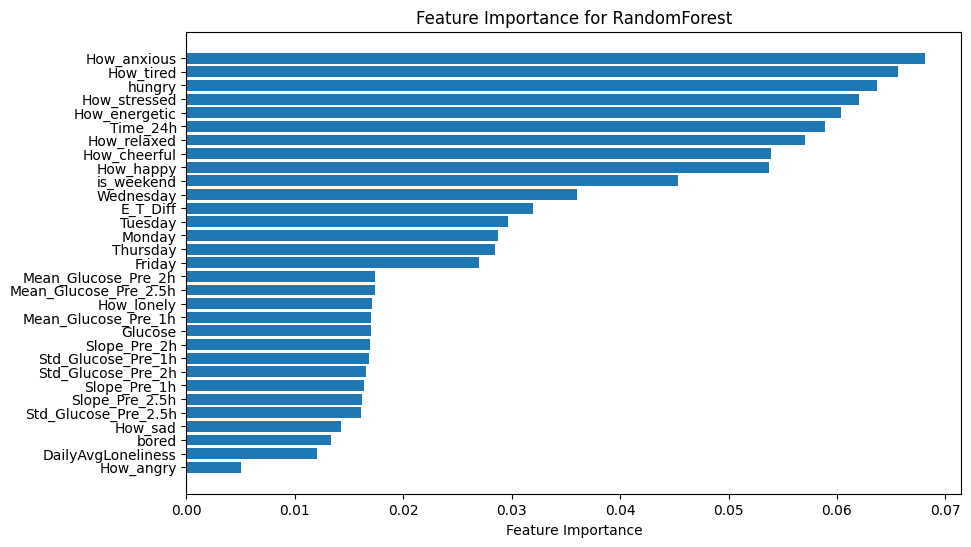

🔹 Feature Importance Table (Descending Order) 🔹
              Feature  Importance
          How_anxious    0.068085
            How_tired    0.065598
               hungry    0.063654
         How_stressed    0.062052
        How_energetic    0.060366
             Time_24h    0.058854
          How_relaxed    0.057067
         How_cheerful    0.053882
            How_happy    0.053761
           is_weekend    0.045377
            Wednesday    0.036031
             E_T_Diff    0.031979
              Tuesday    0.029691
               Monday    0.028719
             Thursday    0.028449
               Friday    0.027012
  Mean_Glucose_Pre_2h    0.017375
Mean_Glucose_Pre_2.5h    0.017350
           How_lonely    0.017070
  Mean_Glucose_Pre_1h    0.017050
              Glucose    0.016979
         Slope_Pre_2h    0.016899
   Std_Glucose_Pre_1h    0.016825
   Std_Glucose_Pre_2h    0.016533
         Slope_Pre_1h    0.016351
       Slope_Pre_2.5h    0.016223
 Std_Glucose_Pre_2.5h    0.016081


In [4]:
import matplotlib.pyplot as plt


# FI
feature_importances = rf_model.feature_importances_
features = X_train.columns

# 
importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)  # 작은 값이 아래, 큰 값이 위

# figure
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], align="center")
plt.xlabel("Feature Importance")
plt.title("Feature Importance for RandomForest")
plt.gca().invert_yaxis()  # 큰 값이 위에 오도록 정렬
plt.show()

print("🔹 Feature Importance Table (Descending Order) 🔹")
print(importance_df.to_string(index=False))

# Recursive Feature Elimination (RFE)

# XGBoost & LightGBM Training

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# ✅ Ensure X_columns exist in df before selection
X_columns = [col for col in X_columns if col in df.columns]

# ✅ Define X and Y datasets
X = df[X_columns]
y = df[Y_column]

# ✅ Remove NaN values from X and Y
print(f"📌 Before NaN removal: {X.shape}, {y.shape}")
df_clean = pd.concat([X, y], axis=1).dropna()  # Remove rows with NaN values
X_clean = df_clean[X_columns]
y_clean = df_clean[Y_column]
print(f"📌 After NaN removal: {X_clean.shape}, {y_clean.shape}")

# ✅ Handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_clean, y_clean)

# ✅ Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# ✅ Train XGBoost Model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# ✅ Make predictions with XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# ✅ Evaluate XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"📌 XGBoost Model Accuracy: {accuracy_xgb:.4f}")
print("🔹 XGBoost Classification Report 🔹")
print(classification_report(y_test, y_pred_xgb))

# ✅ Train LightGBM Model
lgbm_model = LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lgbm_model.fit(X_train, y_train)

# ✅ Make predictions with LightGBM
y_pred_lgbm = lgbm_model.predict(X_test)

# ✅ Evaluate LightGBM
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"📌 LightGBM Model Accuracy: {accuracy_lgbm:.4f}")
print("🔹 LightGBM Classification Report 🔹")
print(classification_report(y_test, y_pred_lgbm))


📌 Before NaN removal: (71717, 31), (71717,)
📌 After NaN removal: (40335, 31), (40335,)
📌 XGBoost Model Accuracy: 0.9767
🔹 XGBoost Classification Report 🔹
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      7851
         1.0       1.00      0.93      0.96      3909

    accuracy                           0.98     11760
   macro avg       0.98      0.96      0.97     11760
weighted avg       0.98      0.98      0.98     11760

[LightGBM] [Info] Number of positive: 15691, number of negative: 31349
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6298
[LightGBM] [Info] Number of data points in the train set: 47040, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333567 -> initscore=-0.692095
[LightGBM] [Inf

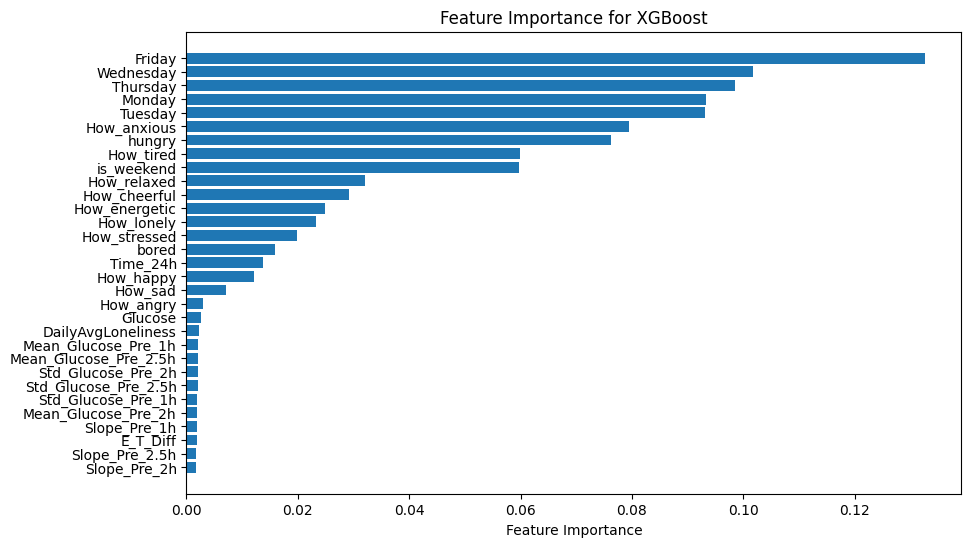

🔹 XGBoost Feature Importance Table (Descending Order) 🔹
              Feature  Importance
               Friday    0.132575
            Wednesday    0.101673
             Thursday    0.098591
               Monday    0.093349
              Tuesday    0.093082
          How_anxious    0.079478
               hungry    0.076191
            How_tired    0.059825
           is_weekend    0.059656
          How_relaxed    0.032015
         How_cheerful    0.029211
        How_energetic    0.024965
           How_lonely    0.023299
         How_stressed    0.019800
                bored    0.015941
             Time_24h    0.013803
            How_happy    0.012212
              How_sad    0.007061
            How_angry    0.002910
              Glucose    0.002654
   DailyAvgLoneliness    0.002299
  Mean_Glucose_Pre_1h    0.002149
Mean_Glucose_Pre_2.5h    0.002121
   Std_Glucose_Pre_2h    0.002118
 Std_Glucose_Pre_2.5h    0.002072
   Std_Glucose_Pre_1h    0.001916
  Mean_Glucose_Pre_2h    0

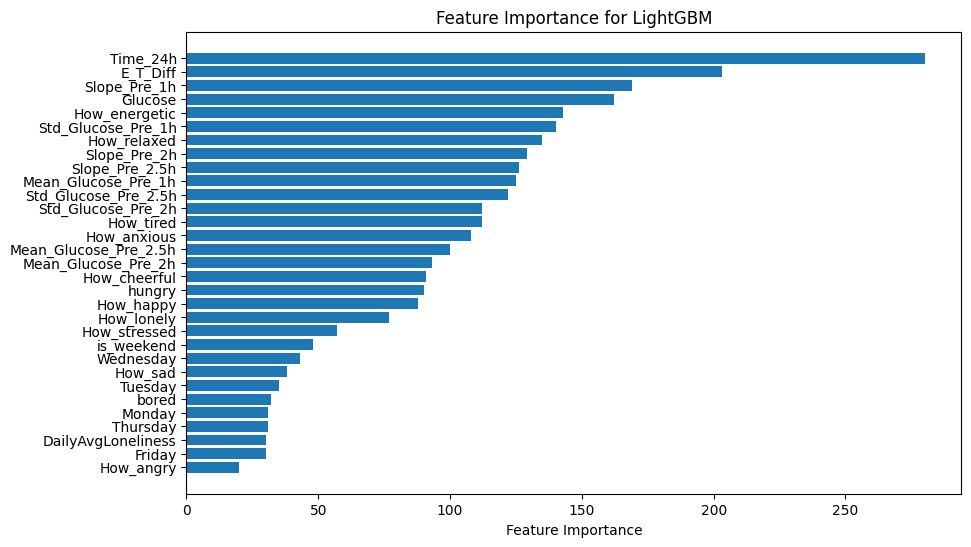

🔹 LightGBM Feature Importance Table (Descending Order) 🔹
              Feature  Importance
             Time_24h         280
             E_T_Diff         203
         Slope_Pre_1h         169
              Glucose         162
        How_energetic         143
   Std_Glucose_Pre_1h         140
          How_relaxed         135
         Slope_Pre_2h         129
       Slope_Pre_2.5h         126
  Mean_Glucose_Pre_1h         125
 Std_Glucose_Pre_2.5h         122
   Std_Glucose_Pre_2h         112
            How_tired         112
          How_anxious         108
Mean_Glucose_Pre_2.5h         100
  Mean_Glucose_Pre_2h          93
         How_cheerful          91
               hungry          90
            How_happy          88
           How_lonely          77
         How_stressed          57
           is_weekend          48
            Wednesday          43
              How_sad          38
              Tuesday          35
                bored          32
               Monday    

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Feature Importance for XGBoost
xgb_feature_importances = xgb_model.feature_importances_
xgb_importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": xgb_feature_importances})
xgb_importance_df = xgb_importance_df.sort_values(by="Importance", ascending=False)

# ✅ Feature Importance for LightGBM
lgbm_feature_importances = lgbm_model.feature_importances_
lgbm_importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": lgbm_feature_importances})
lgbm_importance_df = lgbm_importance_df.sort_values(by="Importance", ascending=False)

# ✅ Plot XGBoost Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(xgb_importance_df["Feature"], xgb_importance_df["Importance"], align="center")
plt.xlabel("Feature Importance")
plt.title("Feature Importance for XGBoost")
plt.gca().invert_yaxis()
plt.show()

print("🔹 XGBoost Feature Importance Table (Descending Order) 🔹")
print(xgb_importance_df.to_string(index=False))

# ✅ Plot LightGBM Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(lgbm_importance_df["Feature"], lgbm_importance_df["Importance"], align="center")
plt.xlabel("Feature Importance")
plt.title("Feature Importance for LightGBM")
plt.gca().invert_yaxis()
plt.show()

print("🔹 LightGBM Feature Importance Table (Descending Order) 🔹")
print(lgbm_importance_df.to_string(index=False))


## ✔ Each model calculates Feature Importance (FI) differently.
## ✔ Random Forest → Based on Gini Impurity reduction (values between 0 and 1).
## ✔ XGBoost → Based on information gain (Gain), with real-valued FI that may focus on specific features.
## ✔ LightGBM → Based on the number of times a feature is used for splitting (integer values, emphasizing frequently used features).

# Plot tree

In [8]:
!pip install graphviz


In [11]:
!pip install pydotplus



  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24551 sha256=73df3b00340b3139d934263bdece7851cca933863aa6988b5990fdf0aa9cb54e
  Stored in directory: /Users/bg.lim/Library/Caches/pip/wheels/fe/cd/78/a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


# Random Forest

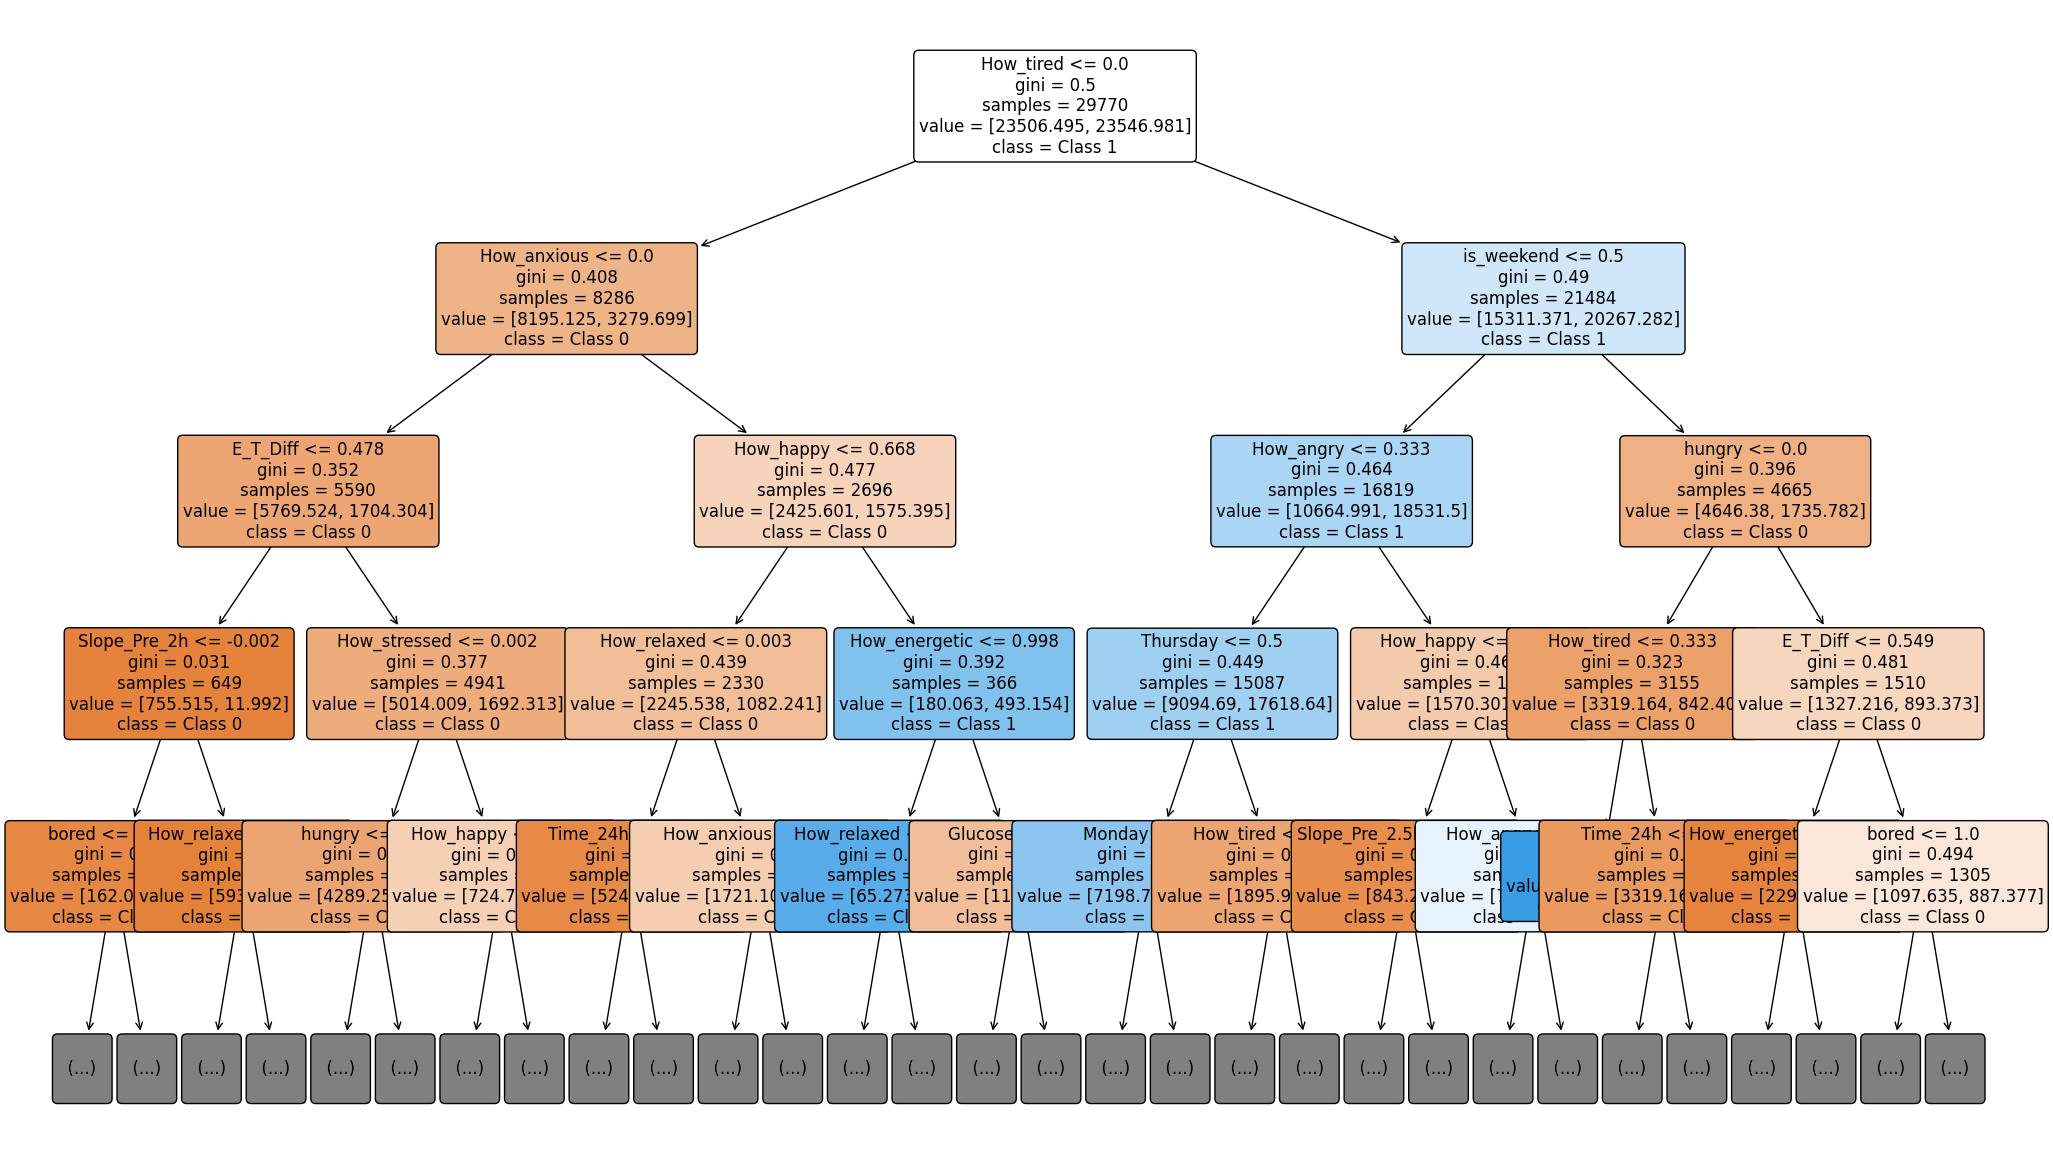

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Select a tree from the trained Random Forest model
tree_index = 0  # Change this to visualize a different tree
selected_tree = rf_model.estimators_[tree_index]  # Access the first tree in the forest

# Plot the selected decision tree
max_depth = 4 
plt.figure(figsize=(25, 15))  # 전체 그래프 크기 조정
plot_tree(rf_model.estimators_[0], 
          feature_names=X_train.columns, 
          filled=True, 
          rounded=True, 
          class_names=["Class 0", "Class 1"], 
          max_depth=max_depth, 
          fontsize=12)  # 글자 크기 조정
plt.show()



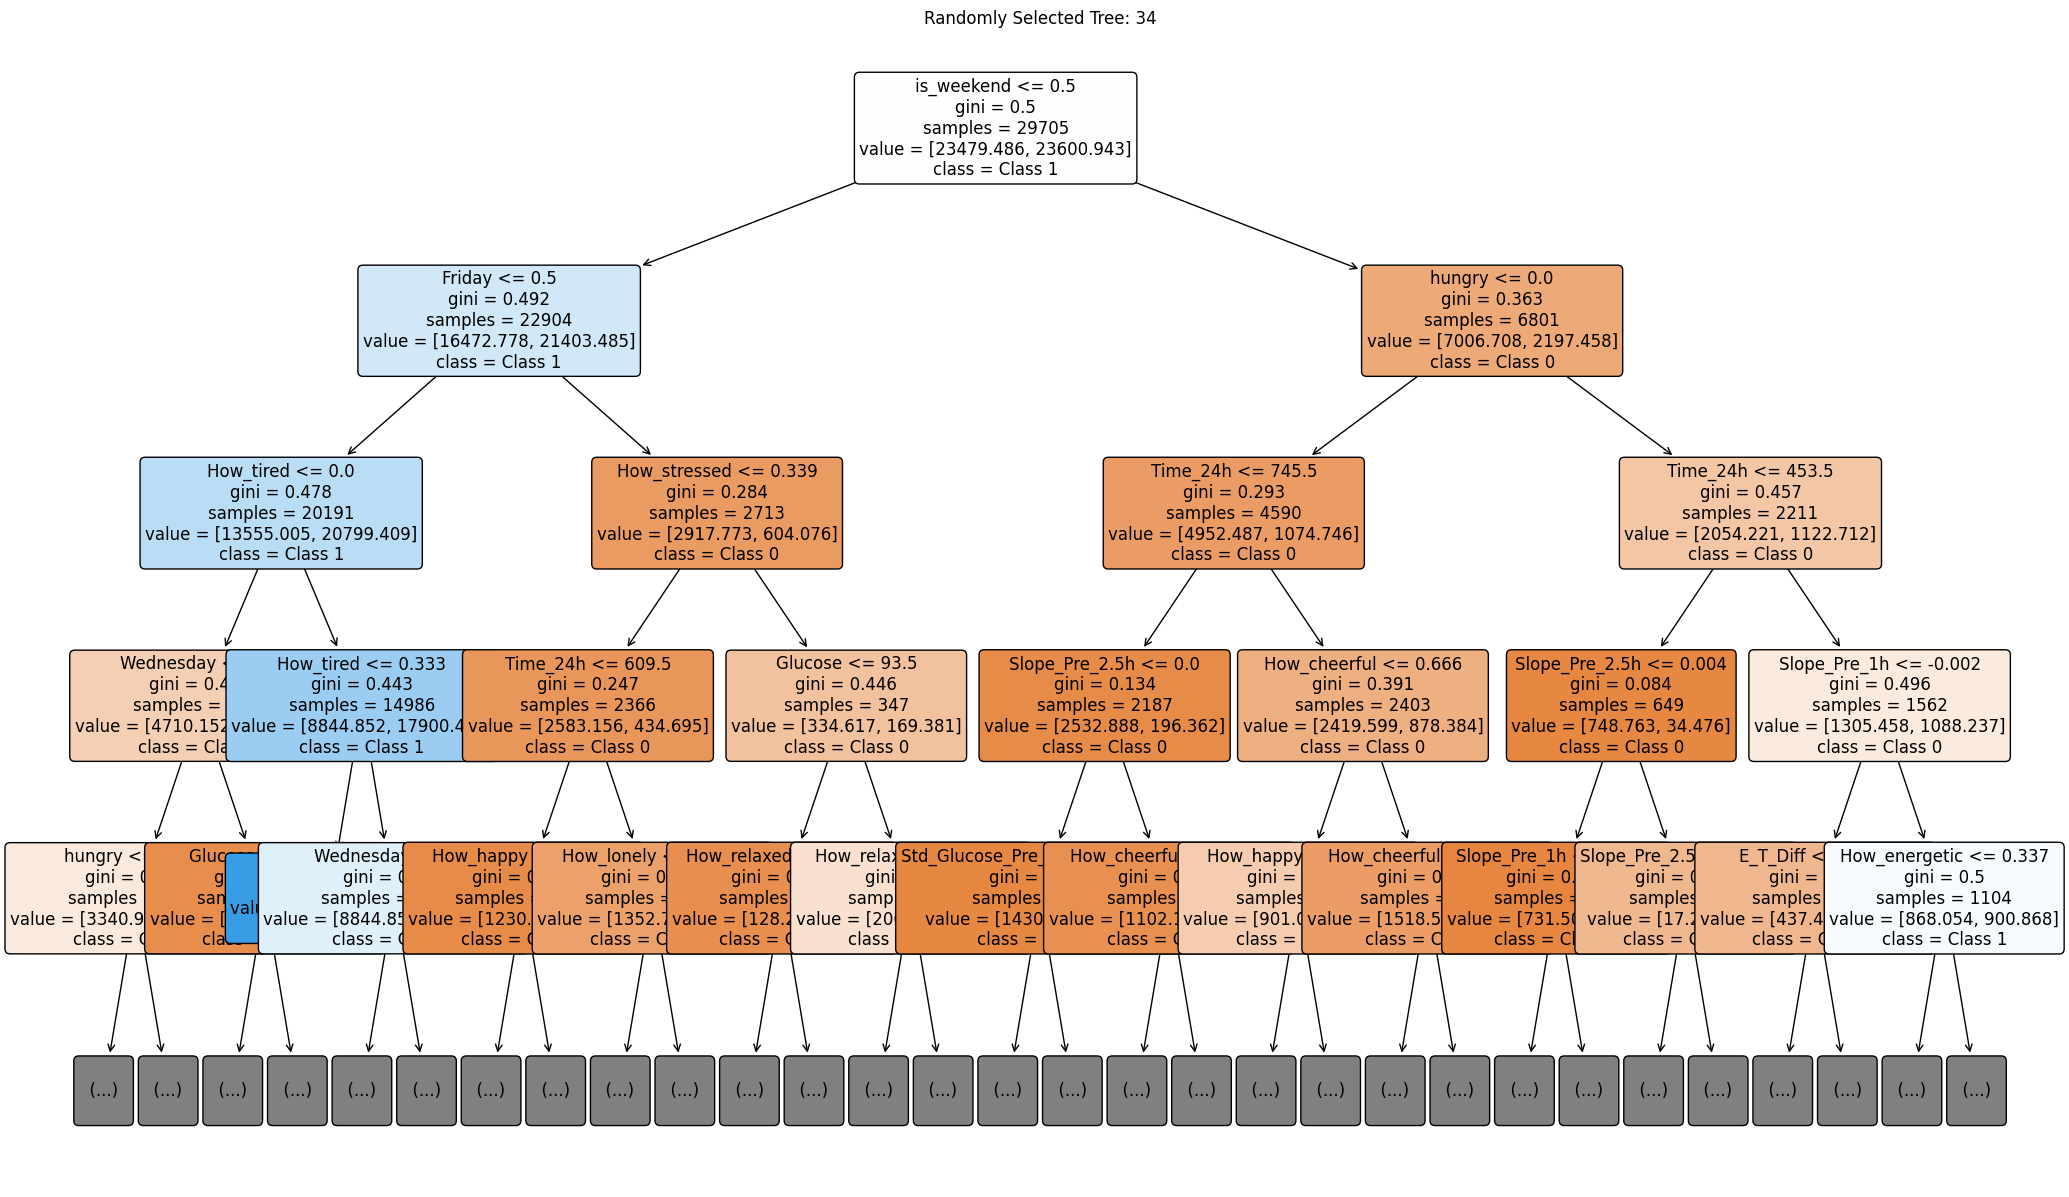

In [26]:
# Select Tree Randomly 
import random
tree_index = random.randint(0, len(rf_model.estimators_) - 1) 

# Figure
plt.figure(figsize=(25, 15))
plot_tree(rf_model.estimators_[tree_index], 
          feature_names=X_train.columns, 
          filled=True, 
          rounded=True, 
          class_names=["Class 0", "Class 1"], 
          max_depth=4, 
          fontsize=12) 
plt.title(f"Randomly Selected Tree: {tree_index}")  # Tree num
plt.show()

# Frequent Features in Trees ≠ Highest Feature Importance
## A feature that appears only in a few key splits but makes a big difference in classification can have a high FI.

In [27]:
# Count the frequency of features used across multiple trees
from collections import Counter

feature_counts = Counter()

# Iterate through all trees in the Random Forest model
for tree in rf_model.estimators_:
    # Extract the features used in the tree (ignore -2, which means no split)
    used_features = [X_train.columns[i] for i in tree.tree_.feature if i != -2]
    # Update the feature count
    feature_counts.update(used_features)

# Print the top 10 most frequently used features in the trees
print("Most Common Features in Trees (TOP 10):")
print(feature_counts.most_common(10))


Most Common Features in Trees (TOP 10):
[('Time_24h', 14594), ('E_T_Diff', 13337), ('Slope_Pre_2.5h', 12825), ('Slope_Pre_2h', 12595), ('Mean_Glucose_Pre_2.5h', 12591), ('Std_Glucose_Pre_2h', 12543), ('Mean_Glucose_Pre_1h', 12513), ('Slope_Pre_1h', 12478), ('Std_Glucose_Pre_2.5h', 12472), ('Mean_Glucose_Pre_2h', 12466)]


# XGBoost 

<Figure size 10500x4500 with 0 Axes>

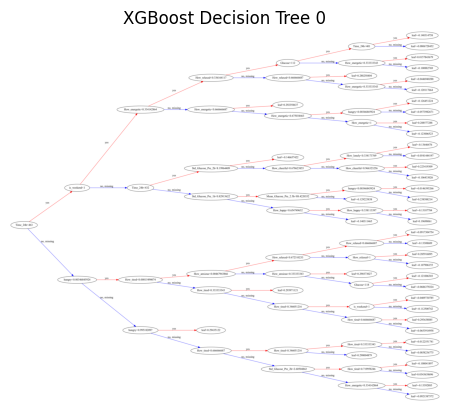

In [33]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

# Select a specific tree to visualize (e.g., the first tree)
tree_index = 0

plt.figure(figsize=(105, 45))
plot_tree(xgb_model, num_trees=tree_index, rankdir="LR")  # LR = Left to Right
plt.title(f"XGBoost Decision Tree {tree_index}")
plt.show()


# lightgbm 

<Figure size 2500x1500 with 0 Axes>

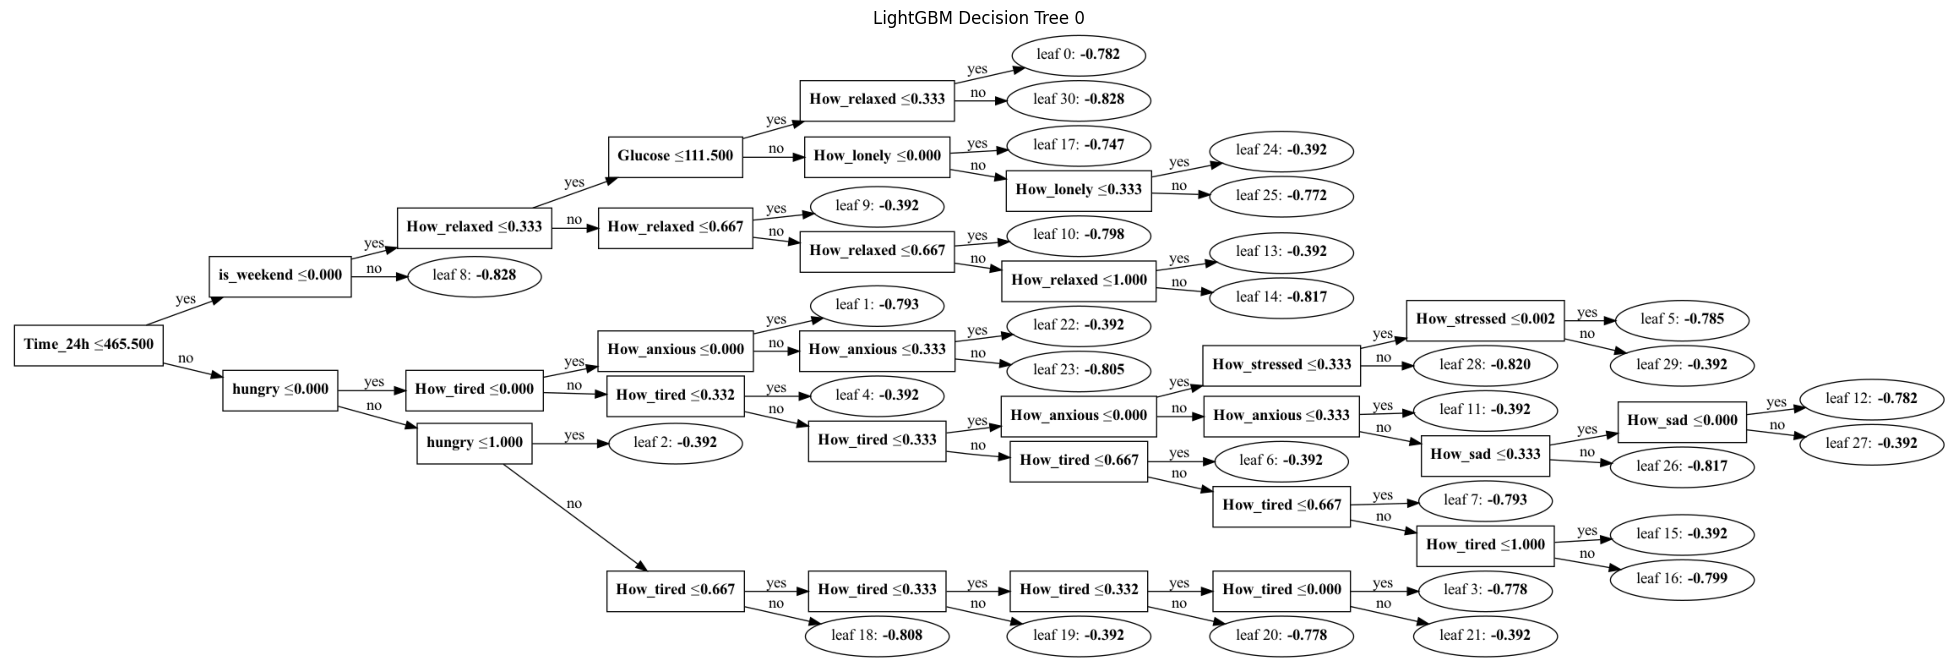

In [34]:
import matplotlib.pyplot as plt
import lightgbm as lgb

# Select a specific tree to visualize (e.g., the first tree)
tree_index = 0

plt.figure(figsize=(25, 15))
lgb.plot_tree(lgbm_model, tree_index=tree_index, figsize=(25, 15))
plt.title(f"LightGBM Decision Tree {tree_index}")
plt.show()


# ALE

In [37]:
!pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython


  Cloning https://github.com/MaximeJumelle/ALEPython.git (to revision dev) to /private/var/folders/r0/h30ywvr55x98xwjf49klh76m0000gp/T/pip-install-q611sydf/alepython_99566a1cb6994afbb684d69267f78f2f
  Running command git clone --filter=blob:none --quiet https://github.com/MaximeJumelle/ALEPython.git /private/var/folders/r0/h30ywvr55x98xwjf49klh76m0000gp/T/pip-install-q611sydf/alepython_99566a1cb6994afbb684d69267f78f2f
  Resolved https://github.com/MaximeJumelle/ALEPython.git to commit 286350ab674980a32270db2a0b5ccca1380312a7
  Preparing metadata (setup.py) ... done
  Created wheel for alepython: filename=alepython-0.1.dev17+g286350a-py3-none-any.whl size=15167 sha256=e7f2dd7de86fd7fad60e0745c6f698202bbf63dd003d49ff001bbf51bb5a12ab
  Stored in directory: /private/var/folders/r0/h30ywvr55x98xwjf49klh76m0000gp/T/pip-ephem-wheel-cache-z12ruvme/wheels/dc/0e/32/bbb5082ce85946e5d7b77a069cc1fd748855631153d53405bb
Successfully built alepython


<Figure size 1000x600 with 0 Axes>

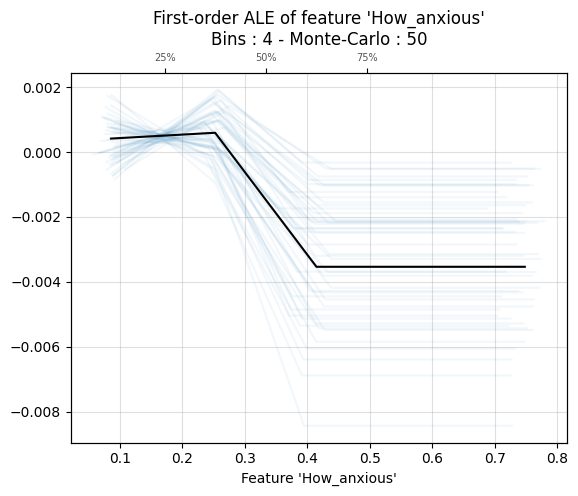

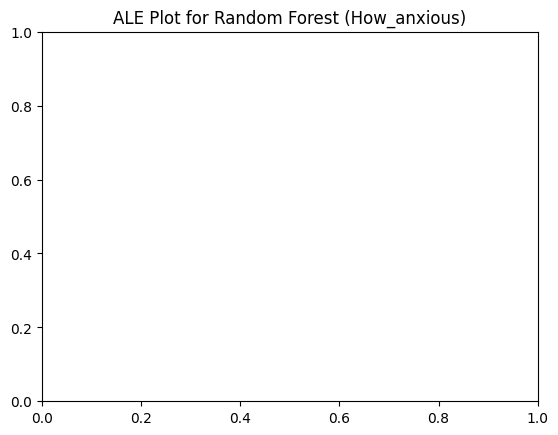

In [41]:
import matplotlib.pyplot as plt
from alepython import ale_plot

# ✅ Feature to analyze (you can change this)
target_feature = "How_anxious"  # Change this to another feature of interest

# ✅ ALE Plot for Random Forest
plt.figure(figsize=(10, 6))
ale_plot(rf_model, X_train, target_feature, monte_carlo=True, bins=10)
plt.title(f"ALE Plot for Random Forest ({target_feature})")
plt.show()



<Figure size 1000x600 with 0 Axes>

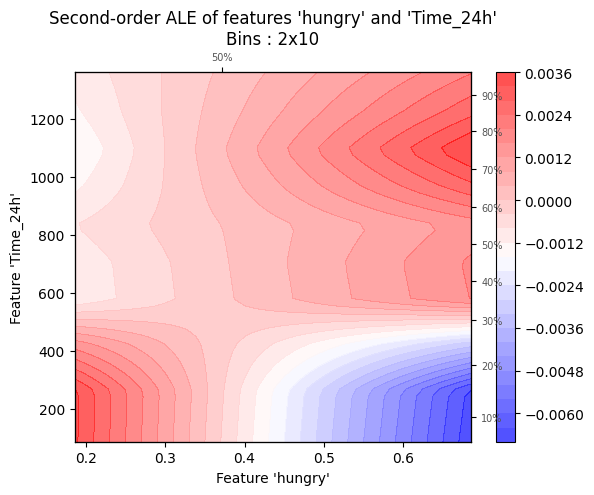

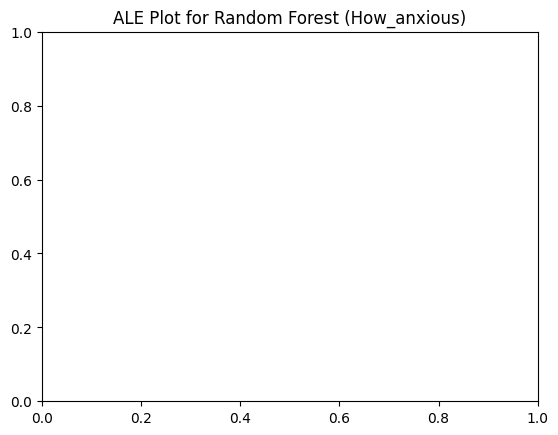

In [46]:
import matplotlib.pyplot as plt
from alepython import ale_plot

# ✅ ALE Plot for Random Forest
plt.figure(figsize=(10, 6))
ale_plot(rf_model, X_train, ['hungry', 'Time_24h'], monte_carlo=True, bins=10)
plt.title(f"ALE Plot for Random Forest ({target_feature})")
plt.show()




<Figure size 1000x600 with 0 Axes>

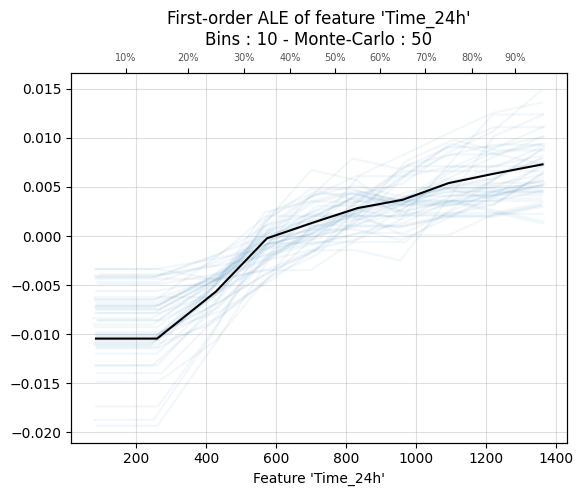

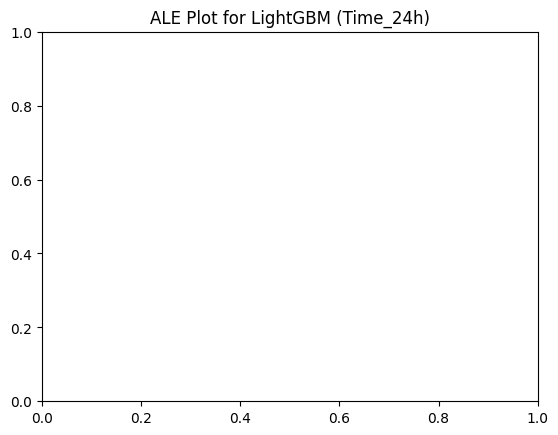

In [47]:
import matplotlib.pyplot as plt
from alepython import ale_plot

# ✅ Feature to analyze (you can change this)
target_feature = "Time_24h"  # Change this to another feature of interest

# ✅ ALE Plot for LightGBM
plt.figure(figsize=(10, 6))
ale_plot(lgbm_model, X_train, target_feature, monte_carlo=True)
plt.title(f"ALE Plot for LightGBM ({target_feature})")
plt.show()


<Figure size 1000x600 with 0 Axes>

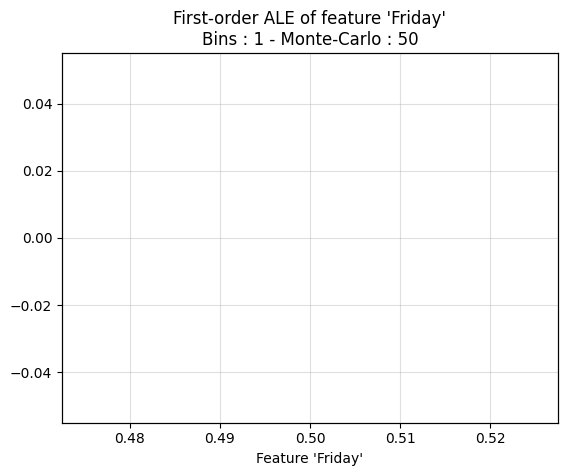

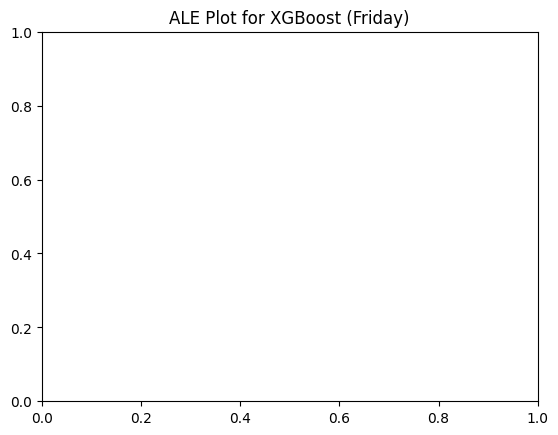

In [48]:
import matplotlib.pyplot as plt
from alepython import ale_plot

# ✅ Feature to analyze (you can change this)
target_feature = "Friday"  # Change this to another feature of interest

# ✅ ALE Plot for XGBoost
plt.figure(figsize=(10, 6))
ale_plot(xgb_model, X_train, target_feature, monte_carlo=True)
plt.title(f"ALE Plot for XGBoost ({target_feature})")
plt.show()



In [ ]:
import matplotlib.pyplot as plt
from alepython import ale_plot

# ✅ Feature to analyze (you can change this)
target_feature = "Friday"  # Change this to another feature of interest

# ✅ ALE Plot for Random Forest
plt.figure(figsize=(10, 6))
ale_plot(rf_model, X_train, target_feature, monte_carlo=True, bins=10)
plt.title(f"ALE Plot for Random Forest ({target_feature})")
plt.show()

# ✅ ALE Plot for XGBoost
plt.figure(figsize=(10, 6))
ale_plot(xgb_model, X_train, target_feature, monte_carlo=True)
plt.title(f"ALE Plot for XGBoost ({target_feature})")
plt.show()

# ✅ ALE Plot for LightGBM
plt.figure(figsize=(10, 6))
ale_plot(lgbm_model, X_train, target_feature, monte_carlo=True)
plt.title(f"ALE Plot for LightGBM ({target_feature})")
plt.show()